In [2]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [3]:
oil_data = "Resources/Historical_Oil_Data.csv"
gold_data = "Resources/Historical_Gold_Data.csv"

In [4]:
oil_data = pd.read_csv(oil_data, parse_dates= ["Date"])
gold_data = pd.read_csv(gold_data, parse_dates = ["Date"])

In [5]:
oil_gold_df = pd.merge(oil_data, gold_data, how="left", on="Date")

In [6]:
type(oil_gold_df["Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
oil_gold_df = oil_gold_df.rename(columns={"Close/Last_x" : "oil_price",
                                "Volume_x" : "oil_volume",
                                "Close/Last_y" : "gold_price",
                                "Volume_y" : "gold_volume"})
oil_gold_df

,Date,oil_price,oil_volume,Open_x,High_x,Low_x,gold_price,gold_volume,Open_y,High_y,Low_y
0,2023-02-03,73.39,394327,75.92,78.00,73.10,1876.6,296669.0,1926.3,1932.4,1874.5
1,2023-02-02,75.88,318489,76.79,77.24,74.97,1930.8,242931.0,1967.1,1975.2,1925.6
2,2023-02-01,76.41,335699,79.06,79.73,76.05,1942.8,205037.0,1944.0,1970.8,1936.1
3,2023-01-31,78.87,292507,77.91,79.25,76.55,1945.3,189046.0,1938.6,1946.9,1915.5
4,2023-01-30,77.90,308615,80.04,80.49,77.66,1939.2,134362.0,1944.0,1950.1,1936.2
...,...,...,...,...,...,...,...,...,...,...,...
1254,2018-02-12,59.29,699404,59.12,60.83,59.10,1326.4,203283.0,1317.1,1330.0,1316.3
1255,2018-02-09,59.20,878528,60.43,60.77,58.07,1315.7,306980.0,1321.0,1325.0,1313.2
1256,2018-02-08,61.15,882388,61.70,62.09,60.27,1319.0,349123.0,1320.7,1324.5,1309.0
1257,2018-02-07,61.79,975908,63.92,64.18,61.25,1314.6,335680.0,1326.6,1334.8,1313.5


In [8]:
oil_gold_df.columns

Index(['Date', 'oil_price', 'oil_volume', 'Open_x', 'High_x', 'Low_x',
       'gold_price', 'gold_volume', 'Open_y', 'High_y', 'Low_y'],
      dtype='object')

In [9]:
clean_oil_gold_df = oil_gold_df[['Date', 'oil_price', 'oil_volume','gold_price', 'gold_volume']]
clean_oil_gold_df

,Date,oil_price,oil_volume,gold_price,gold_volume
0,2023-02-03,73.39,394327,1876.6,296669.0
1,2023-02-02,75.88,318489,1930.8,242931.0
2,2023-02-01,76.41,335699,1942.8,205037.0
3,2023-01-31,78.87,292507,1945.3,189046.0
4,2023-01-30,77.90,308615,1939.2,134362.0
...,...,...,...,...,...
1254,2018-02-12,59.29,699404,1326.4,203283.0
1255,2018-02-09,59.20,878528,1315.7,306980.0
1256,2018-02-08,61.15,882388,1319.0,349123.0
1257,2018-02-07,61.79,975908,1314.6,335680.0


In [10]:
date_index_df = clean_oil_gold_df.set_index(["Date"]).sort_values(["Date"])
date_index_df.head()

,oil_price,oil_volume,gold_price,gold_volume
Date,,,,
2018-02-06,63.39,773274,1329.5,457363.0
2018-02-07,61.79,975908,1314.6,335680.0
2018-02-08,61.15,882388,1319.0,349123.0
2018-02-09,59.20,878528,1315.7,306980.0
2018-02-12,59.29,699404,1326.4,203283.0


In [11]:
date_index_df.index

DatetimeIndex(['2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09',
               '2018-02-12', '2018-02-13', '2018-02-14', '2018-02-15',
               '2018-02-16', '2018-02-20',
               ...
               '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26',
               '2023-01-27', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

Text(0.5, 1.0, 'Change of Price in Gold over Time')

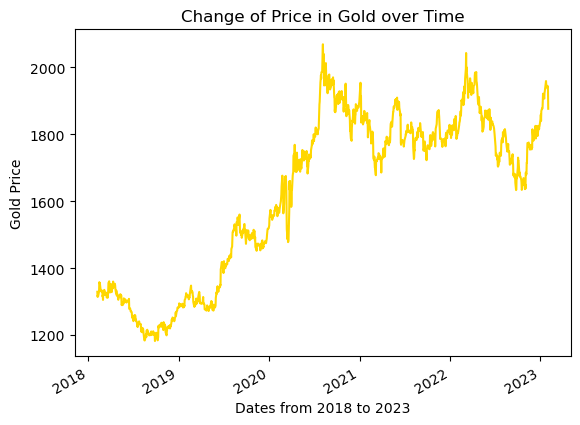

In [12]:
date_index_df.gold_price.plot(color = "gold") # Daily gold prices
plt.xlabel("Dates from 2018 to 2023")
plt.ylabel("Gold Price")
plt.title("Change of Price in Gold over Time")

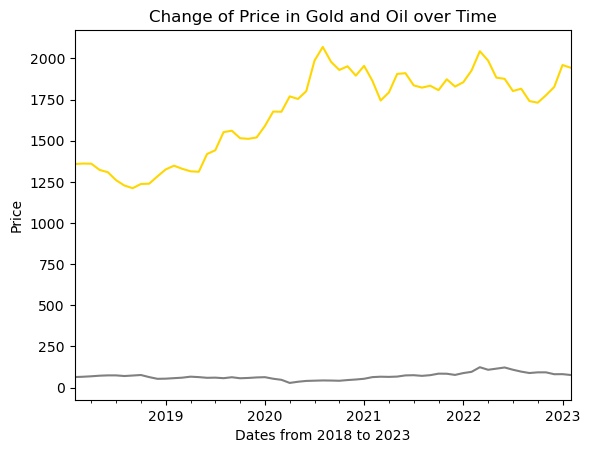

In [13]:
date_index_df.gold_price.resample("M").max().plot(color = "gold")
date_index_df.oil_price.resample("M").max().plot(color = "grey")
plt.xlabel("Dates from 2018 to 2023")
plt.ylabel("Price")
plt.title("Change of Price in Gold and Oil over Time")
plt.show()

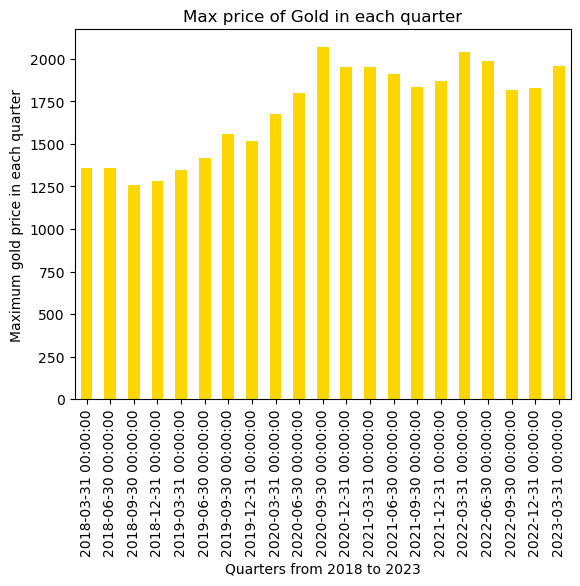

In [14]:
date_index_df.gold_price.resample("Q").max().plot(kind="bar", color = "gold") # Quarterly Max gold prices
plt.xlabel("Quarters from 2018 to 2023")
plt.ylabel("Maximum gold price in each quarter")
plt.title("Max price of Gold in each quarter")
plt.show()

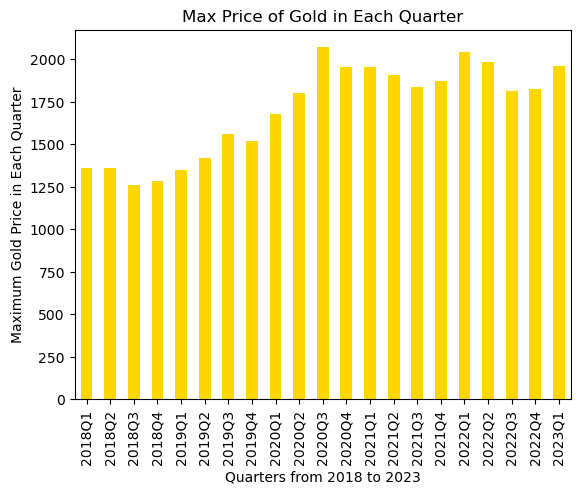

In [15]:
###############
clean_oil_gold_df.groupby(clean_oil_gold_df["Date"].dt.to_period('Q'))['gold_price'].max().plot(kind="bar", color = "gold")
plt.xlabel("Quarters from 2018 to 2023")
plt.ylabel("Maximum Gold Price in Each Quarter")
plt.title("Max Price of Gold in Each Quarter")
plt.show()

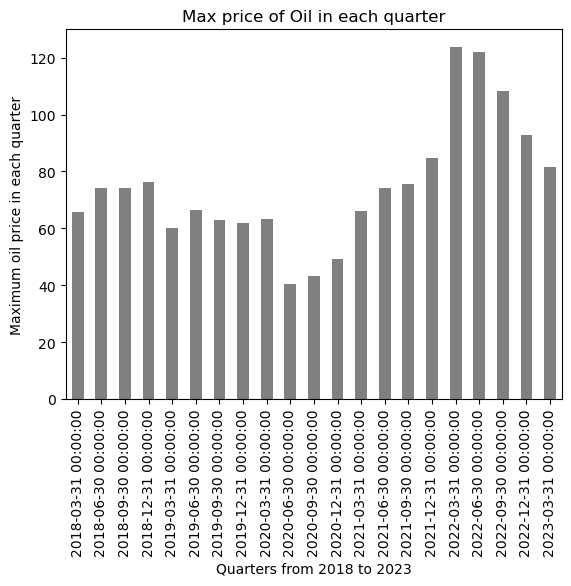

In [67]:
date_index_df.oil_price.resample("Q").max().plot(kind="bar", color = "grey") # Quarterly Max gold prices
plt.xlabel("Quarters from 2018 to 2023")
plt.ylabel("Maximum oil price in each quarter")
plt.title("Max price of Oil in each quarter")
plt.show()

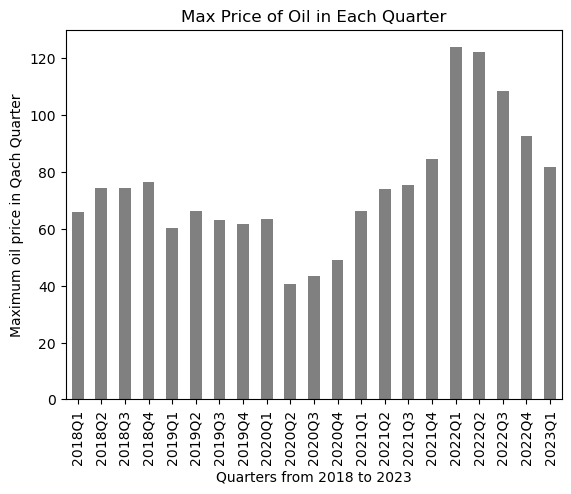

In [16]:
###############
clean_oil_gold_df.groupby(clean_oil_gold_df["Date"].dt.to_period('Q'))['oil_price'].max().plot(kind="bar", color = "grey")
plt.xlabel("Quarters from 2018 to 2023")
plt.ylabel("Maximum oil price in Qach Quarter")
plt.title("Max Price of Oil in Each Quarter")
plt.show()

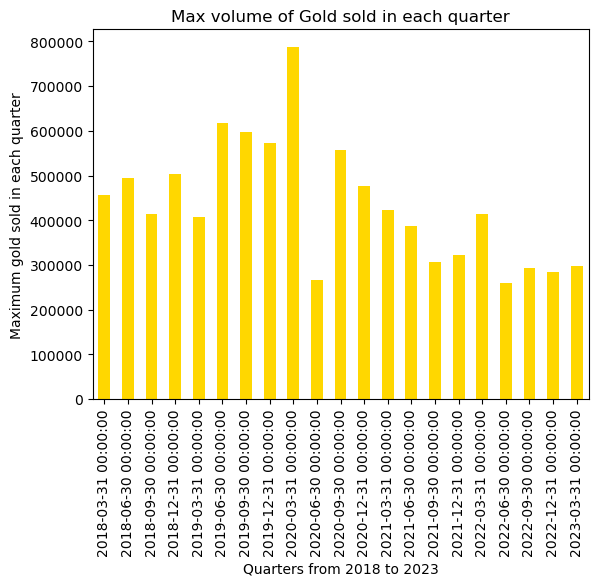

In [68]:
date_index_df.gold_volume.resample("Q").max().plot(kind="bar", color="gold") # Quarterly gold volume
plt.xlabel("Quarters from 2018 to 2023")
plt.ylabel("Maximum gold sold in each quarter")
plt.title("Max volume of Gold sold in each quarter")
plt.show()

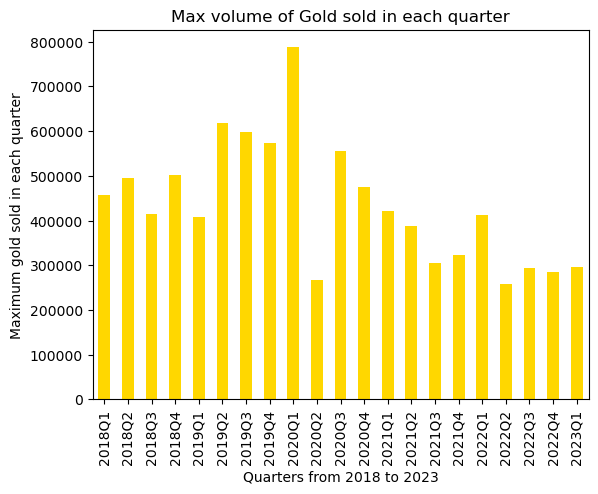

In [17]:
###############
clean_oil_gold_df.groupby(clean_oil_gold_df["Date"].dt.to_period('Q'))['gold_volume'].max().plot(kind="bar", color = "gold") # Quarterly gold volume
plt.xlabel("Quarters from 2018 to 2023")
plt.ylabel("Maximum gold sold in each quarter")
plt.title("Max volume of Gold sold in each quarter")
plt.show()

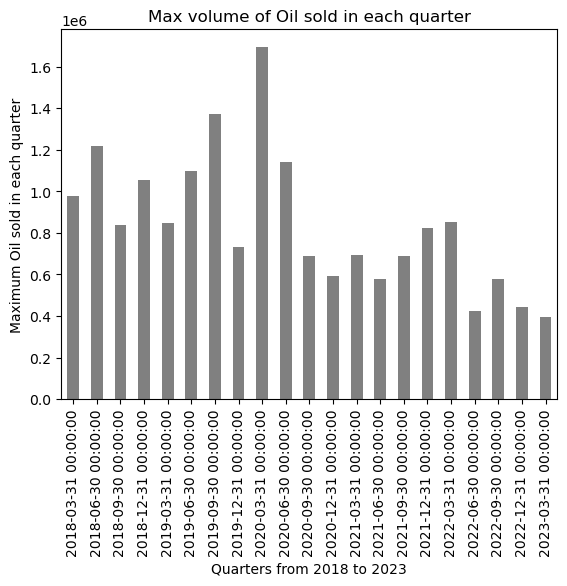

In [69]:
date_index_df.oil_volume.resample("Q").max().plot(kind="bar",color = "grey") # Quarterly gold volume
plt.xlabel("Quarters from 2018 to 2023")
plt.ylabel("Maximum Oil sold in each quarter")
plt.title("Max volume of Oil sold in each quarter")
plt.show()

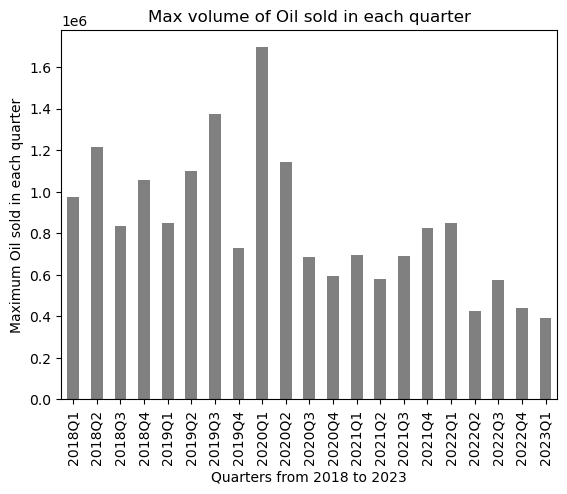

In [18]:
###############
clean_oil_gold_df.groupby(clean_oil_gold_df["Date"].dt.to_period('Q'))['oil_volume'].max().plot(kind="bar", color = "grey") # Quarterly gold volume
plt.xlabel("Quarters from 2018 to 2023")
plt.ylabel("Maximum Oil sold in each quarter")
plt.title("Max volume of Oil sold in each quarter")
plt.show()

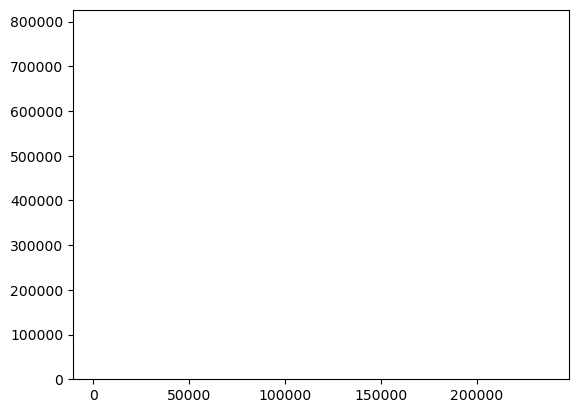

In [52]:
plt.bar(date_index_df.gold_volume.resample("Y").mean(),date_index_df.gold_volume.resample("Y").max())
plt.bar(date_index_df.gold_price.resample("Y").mean(),date_index_df.gold_price.resample("Y").max())
# date_index_df.gold_volume.resample("Q").mean().plot(kind="bar")
# date_index_df.gold_price.resample("Q").mean().plot(kind="bar" , color="red" , alpha= 0.5, align="center")
plt.show()

<AxesSubplot:xlabel='Date'>

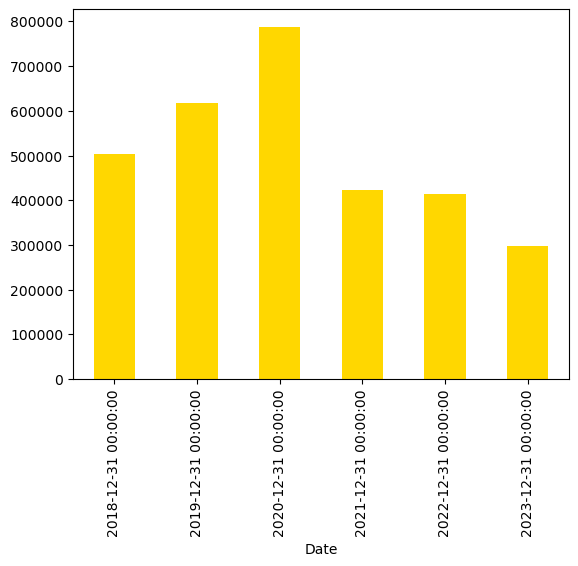

In [70]:
date_index_df.gold_volume.resample("Y").max().plot(kind="bar" , color="gold" , align="center") 

<AxesSubplot:xlabel='Date'>

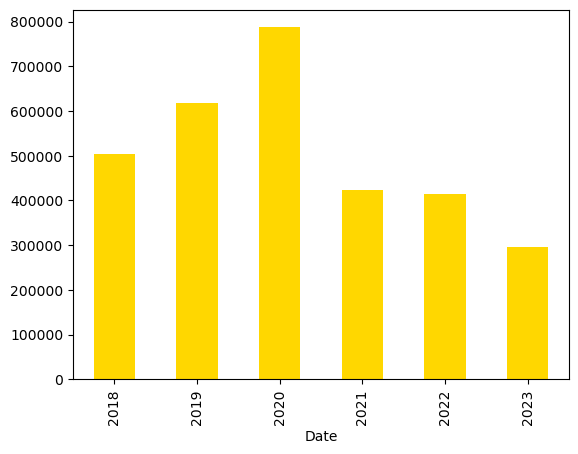

In [19]:
###############
clean_oil_gold_df.groupby(clean_oil_gold_df["Date"].dt.to_period('Y'))['gold_volume'].max().plot(kind="bar" , color="gold" , align="center") 

<AxesSubplot:xlabel='Date'>

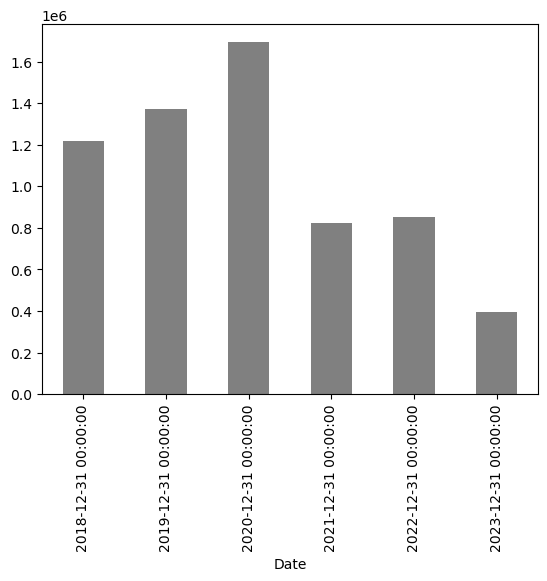

In [71]:
date_index_df.oil_volume.resample("Y").max().plot(kind="bar" , color="grey" , align="center") 

<AxesSubplot:xlabel='Date'>

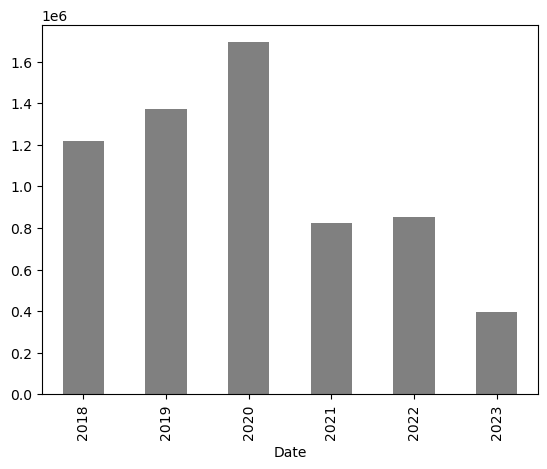

In [20]:
###############
clean_oil_gold_df.groupby(clean_oil_gold_df["Date"].dt.to_period('Y'))['oil_volume'].max().plot(kind="bar" , color="grey" , align="center") 

In [16]:
x_axis = np.arange(len(clean_oil_gold_df))
tick_location = [value for value in x_axis]

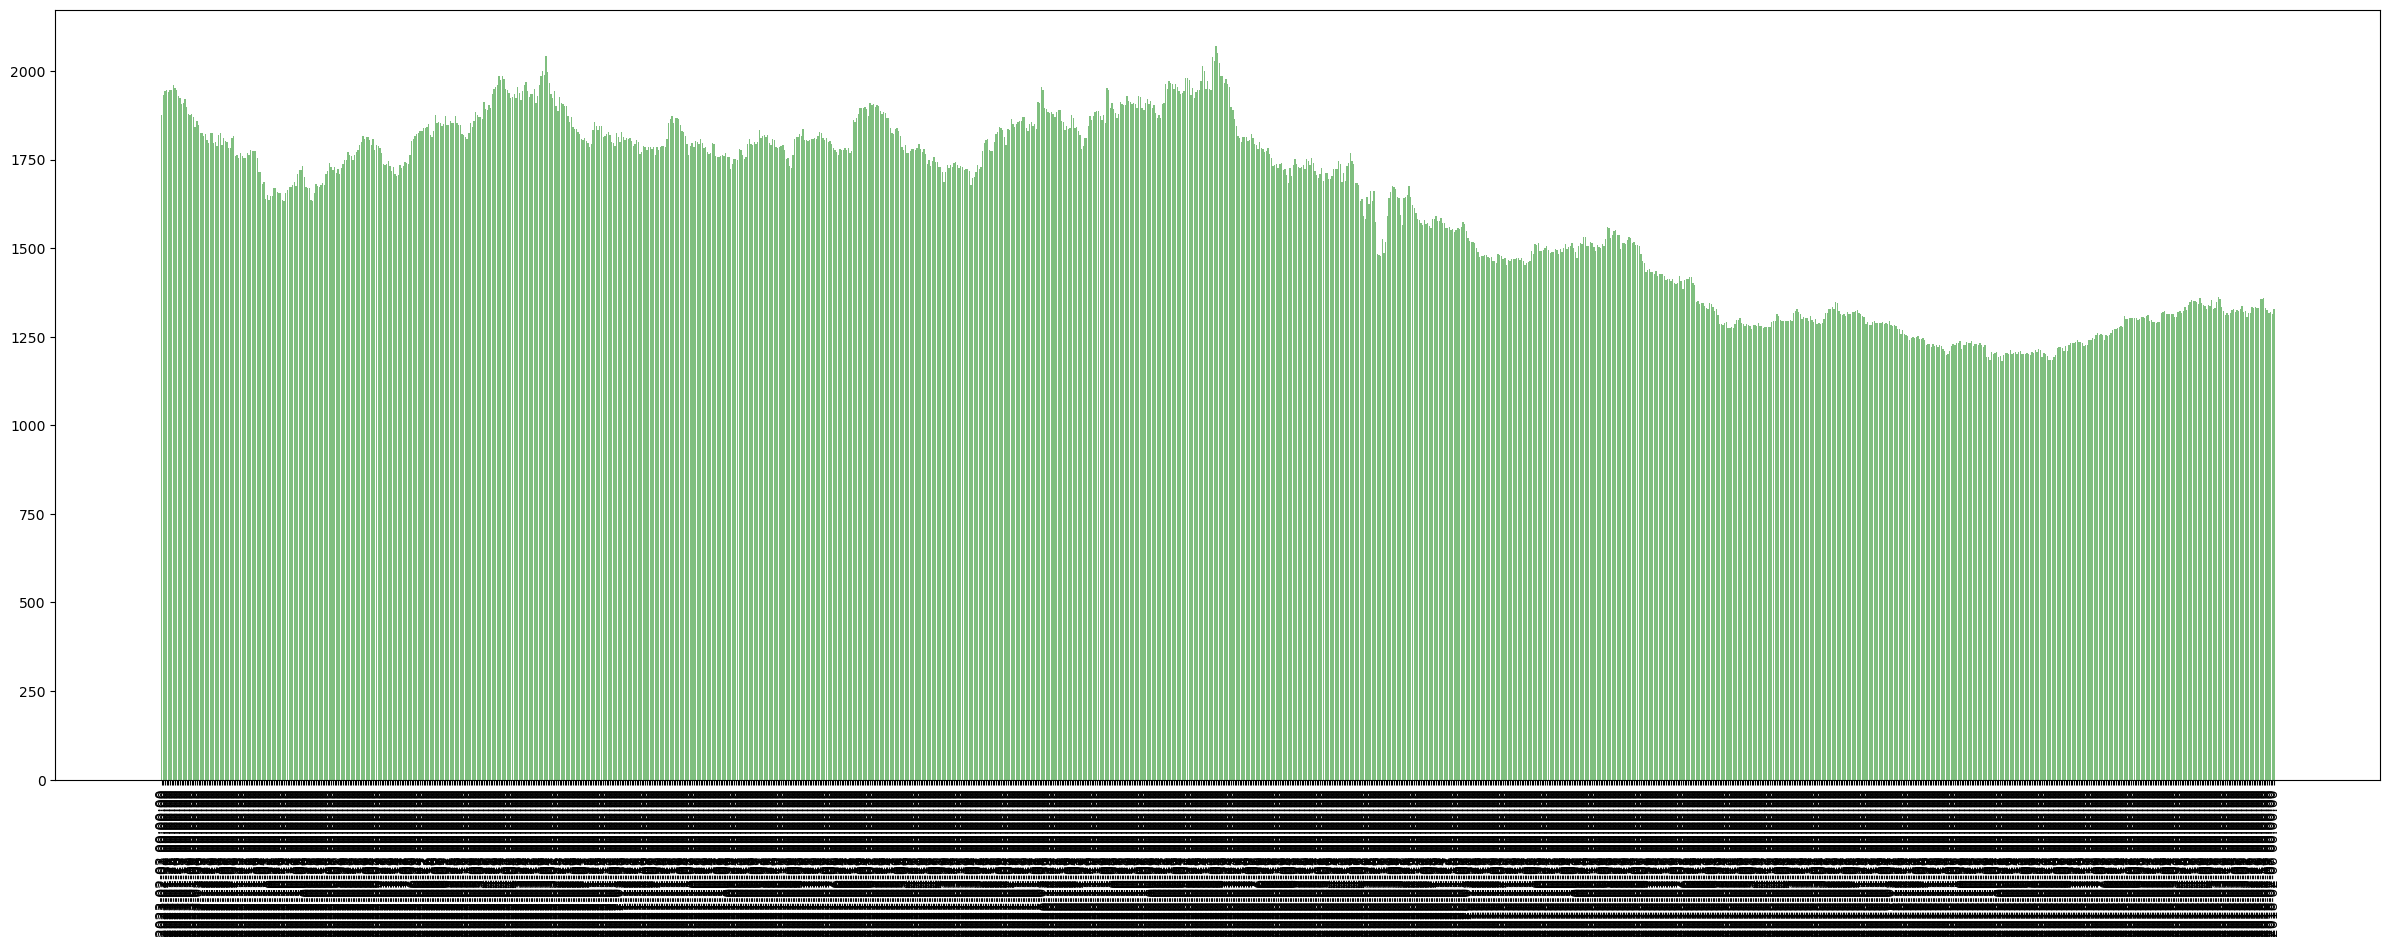

In [17]:
plt.figure(figsize=(30,10))
plt.bar(x_axis, clean_oil_gold_df["gold_price"], color="green" , alpha= 0.5, align="center")
plt.xticks(tick_location,clean_oil_gold_df["Date"], rotation="vertical")
plt.show()

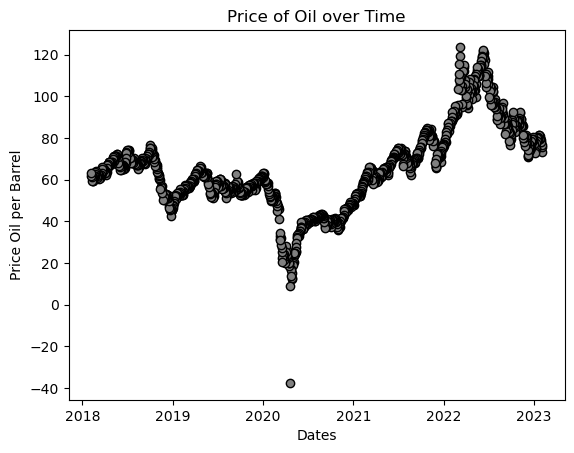

In [76]:
x_values = clean_oil_gold_df["Date"]
y_values = clean_oil_gold_df["oil_price"]

plt.scatter(x_values,y_values,edgecolors="black", c="grey")
plt.xlabel("Dates")
plt.ylabel("Price Oil per Barrel")
plt.title("Price of Oil over Time")
plt.show()

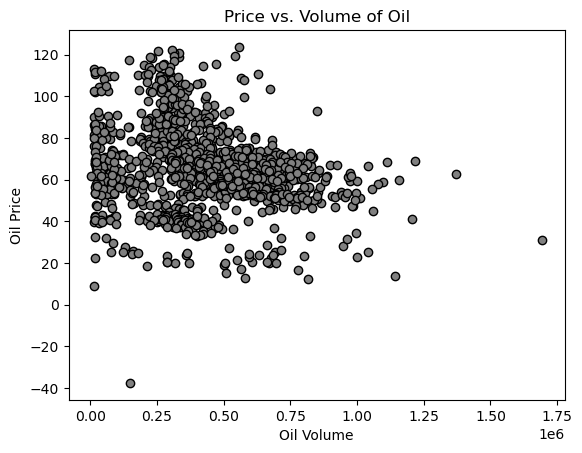

In [80]:
x_values = clean_oil_gold_df["oil_volume"]
y_values = clean_oil_gold_df["oil_price"]

plt.scatter(x_values,y_values,edgecolors="black", c="grey")
plt.xlabel("Oil Volume")
plt.ylabel("Oil Price")
plt.title("Price vs. Volume of Oil")
plt.show()

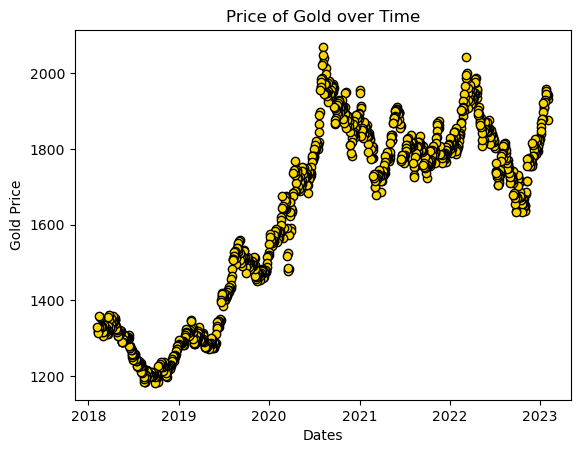

In [79]:
x_values = clean_oil_gold_df["Date"]
y_values = clean_oil_gold_df["gold_price"]

plt.scatter(x_values,y_values,edgecolors="black", c="gold")
plt.xlabel("Dates")
plt.ylabel("Gold Price")
plt.title("Price of Gold over Time")
plt.show()

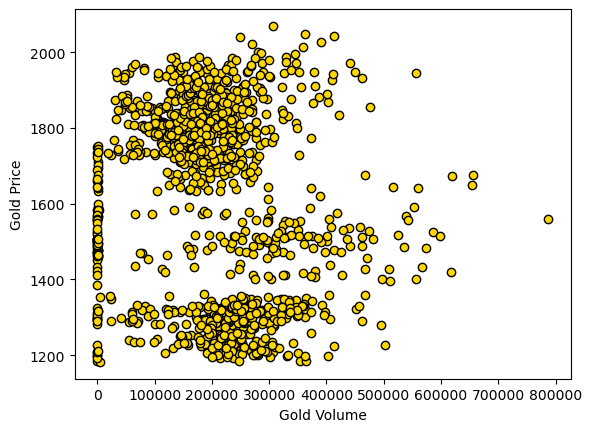

In [78]:
x_values = clean_oil_gold_df["gold_volume"]
y_values = clean_oil_gold_df["gold_price"]

plt.scatter(x_values,y_values,edgecolors="black", c="gold")
plt.xlabel("Gold Volume")
plt.ylabel("Gold Price")
plt.show()

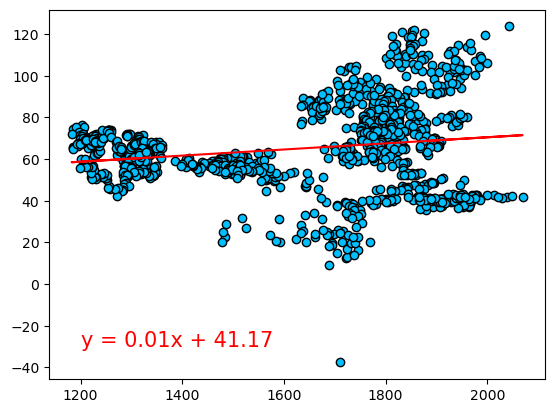

In [20]:
x_values = clean_oil_gold_df["gold_price"]
y_values = clean_oil_gold_df["oil_price"]
correlation = round(st.pearsonr(x_values,y_values)[0],2)
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regression_values = x_values*slope +intercept
Regression_Line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black", c="deepskyblue")
plt.plot(x_values,regression_values,color = "red",alpha=1)
plt.annotate(Regression_Line,(1200,-30),fontsize=15,color="red")

plt.show()